In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import os

### Load the Data

In [16]:
#relative path
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_path = os.path.join(parent_dir, 'Data', 'train_clean.csv')
test_path = os.path.join(parent_dir, 'Data', 'test_clean.csv')

# Load data and test data
data = pd.read_csv(data_path, index_col = 0)
test = pd.read_csv(test_path, index_col = 0)

# Separate data into X and Y
y = data.SalePrice
X = data.drop("SalePrice", axis = 1)

# Split the data into training and validation set
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state=2024)

# Print feature shape
X.shape

(1460, 111)

### Preprocess

#### Imputation

In [17]:
# Preprocessing
from sklearn.impute import SimpleImputer
SimImputer = SimpleImputer(strategy="constant", fill_value=0)

# Impute with average value in each columns
train_X_final = pd.DataFrame(SimImputer.fit_transform(train_X))
val_X_final = pd.DataFrame(SimImputer.fit_transform(val_X))

# Put back column names
train_X_final.columns = train_X.columns
val_X_final.columns = val_X.columns

### Linear Regression

In [18]:
# y transformations
def glm_y_transform(y):
    # y_trans = np.sqrt(train_y) # mse: 18721
    y_trans = np.log(y) # mse: 17754
    return y_trans
def glm_y_reverse(y_transformed):
    # y_orig = y_transformed**2
    y_orig = np.exp(y_transformed)
    return y_orig

train_y_final = glm_y_transform(train_y)

In [19]:
train_X_final.dtypes

1stFlrSF                 float64
2ndFlrSF                 float64
3SsnPorch                float64
BedroomAbvGr             float64
EnclosedPorch            float64
                          ...   
SaleCondition_Alloca     float64
SaleCondition_Family     float64
SaleCondition_Normal     float64
SaleCondition_Partial    float64
Street_Pave              float64
Length: 111, dtype: object

In [20]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(train_X_final, train_y_final)

# Make predictions on the testing data
y_pred = model.predict(val_X_final)

# Evaluate the model
y_pred_final = glm_y_reverse(y_pred)
mse = mean_absolute_error(val_y, y_pred_final)
print(f"mse: {mse}")

mse: 17885.474428690988


### Residual Analysis

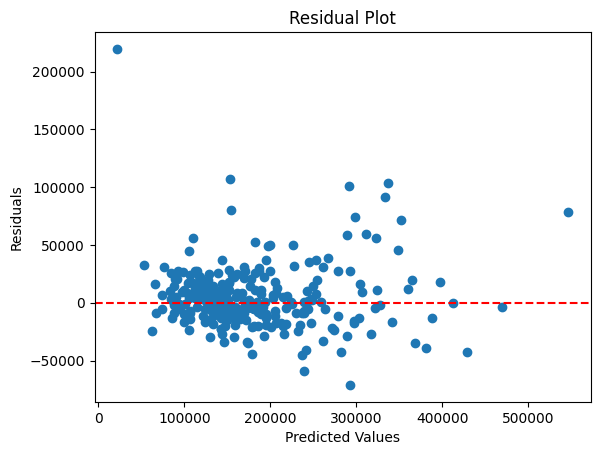

In [21]:
residuals = val_y - y_pred_final

plt.scatter(y_pred_final, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Generate Test Prediction

In [22]:
# Test set imputation
# Impute with average value in each columns
test_final = pd.DataFrame(SimImputer.fit_transform(test))

# Put back column names
test_final.columns = test.columns

In [23]:
test_pred = model.predict(test_final)
test_pred_final = glm_y_reverse(test_pred)

output = pd.DataFrame({'Id': test.index,
                       'SalePrice': test_pred_final})
output.to_csv('submission.csv', index=False)